In [2]:
# 01_intro_to_data.ipynb
# 📘 Introduction to College Football Data Starter Pack

# ---
# 👋 Welcome!
# This notebook introduces you to the structure and content of the CFB Starter Pack.
# You'll learn how to load game data and link it to play and drive data.
# All data is provided as CSVs for easy access — no API setup required.

# 🧰 Requirements:
# - Python 3.8+
# - pandas, matplotlib (install via `pip install pandas matplotlib`)

import pandas as pd
import matplotlib.pyplot as plt
import os

# Set this to your local path to the unpacked ZIP if needed
DATA_DIR = "./data"

In [3]:
# 📂 Load games.csv — your entry point to each season

games_path = os.path.join(DATA_DIR, "games.csv")
games = pd.read_csv(games_path)

print(f"{len(games):,} total games loaded")
games.head()

106,763 total games loaded


/tmp/ipykernel_9888/175881754.py:4: DtypeWarning: Columns (5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.read_csv(games_path)


,id,season,season_type,week,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,away_team_id,away_team,away_conference_id,away_conference,away_classification,away_points,away_line_scores,away_postgame_win_prob,away_start_elo,away_end_elo
0,1,1869,regular,1,1869-11-06,NaN,False,NaN,NaN,NaN,...,163,Princeton,NaN,NaN,NaN,4.0,[],NaN,NaN,NaN
1,2,1869,regular,2,1869-11-13,NaN,False,NaN,NaN,NaN,...,164,Rutgers,NaN,NaN,NaN,0.0,[],NaN,NaN,NaN
2,3,1870,regular,1,1870-11-05,NaN,False,NaN,NaN,NaN,...,171,Columbia,NaN,NaN,NaN,3.0,[],NaN,NaN,NaN
3,4,1870,regular,2,1870-11-12,NaN,False,NaN,NaN,NaN,...,164,Rutgers,NaN,NaN,NaN,2.0,[],NaN,NaN,NaN
4,5,1872,regular,1,1872-11-02,NaN,False,NaN,NaN,NaN,...,171,Columbia,NaN,NaN,NaN,0.0,[],NaN,NaN,NaN


In [4]:
# Set the display options for better readability
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [20,10]

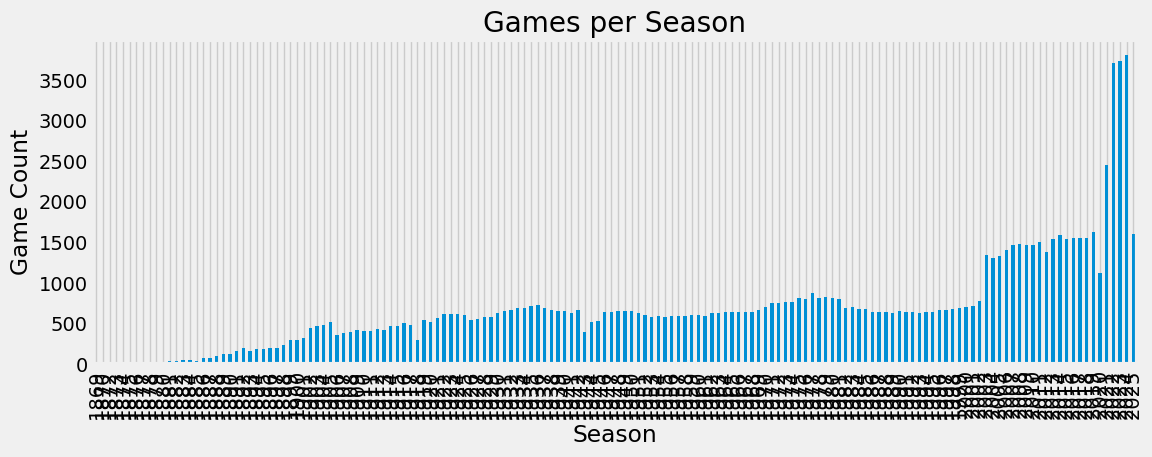

In [5]:
# 🔍 Explore games by season
games['season'].value_counts().sort_index().plot(kind='bar', figsize=(12,4), title='Games per Season')
plt.ylabel('Game Count')
plt.xlabel('Season')
plt.grid(axis='y')
plt.show()

In [6]:
# 🎯 Let's zoom in on a specific game
# Example: 2023 National Championship (Michigan vs. Washington)

sample_game = games[
    (games['season'] == 2023) &
    (games['season_type'] == 'postseason') &
    (games['home_team'] == "Michigan") &
    (games['away_team'] == "Washington")
].iloc[0]

print(f"Selected Game ID: {sample_game['id']}")
sample_game


Selected Game ID: 401551789


id                                                      401551789
season                                                       2023
season_type                                            postseason
week                                                            1
start_date                                    2024-01-09 00:30:00
start_time_tbd                                              False
neutral_site                                                 True
conference_game                                             False
attendance                                                72808.0
venue_id                                                   3891.0
notes                     CFP National Championship Pres. by AT&T
status                                                  completed
excitement                                               5.666155
home_team_id                                                  130
home_team                                                Michigan
home_confe

In [7]:
# 📜 Load plays and drives for that game
# Note: Plays and drives are split into weekly CSVs

plays_path = os.path.join(DATA_DIR, "plays", "2023", "postseason_1_plays.csv")
drives_path = os.path.join(DATA_DIR, "drives", "drives_2023.csv")

plays = pd.read_csv(plays_path)
drives = pd.read_csv(drives_path)

# Filter for this game
game_id = sample_game['id']
plays = plays.query(f"gameId == {game_id}")
drives = drives.query(f"gameId == {game_id}")

print(f"{len(plays):,} plays, {len(drives):,} drives")


173 plays, 26 drives


In [8]:
# 🧠 View a few plays
plays[['period', 'clock', 'offense', 'defense', 'down', 'distance', 'yardsToGoal', 'yardsGained', 'playText']].head(10)

,period,clock,offense,defense,down,distance,yardsToGoal,yardsGained,playText
3750,1,"{'seconds': 22, 'minutes': 6}",Washington,Michigan,2,10,26,9,Jalen McMillan run for 9 yds to the MICH 17
3751,1,"{'seconds': 27, 'minutes': 6}",Washington,Michigan,1,10,26,0,Michael Penix Jr. pass incomplete to Will Nixon
3752,1,"{'seconds': 55, 'minutes': 6}",Washington,Michigan,2,10,42,16,Michael Penix Jr. pass complete to Rome Odunze...
3753,1,"{'seconds': 59, 'minutes': 3}",Washington,Michigan,3,8,8,0,Michael Penix Jr. pass incomplete to Rome Odunze
3754,1,"{'seconds': 56, 'minutes': 3}",Washington,Michigan,4,8,8,25,Grady Gross 25 Yd Field Goal
3755,1,"{'seconds': 4, 'minutes': 4}",Washington,Michigan,3,8,8,0,"Timeout Washington, clock 04:04"
3756,1,"{'seconds': 56, 'minutes': 3}",Washington,Michigan,4,8,65,14,"Grady Gross kickoff for 65 yds, Semaj Morgan r..."
3757,1,"{'seconds': 11, 'minutes': 2}",Washington,Michigan,1,10,75,5,Michael Penix Jr. run for 5 yds to the WASH 30
3758,1,"{'seconds': 40, 'minutes': 1}",Washington,Michigan,2,5,70,0,Dillon Johnson run for no gain to the WASH 30
3759,1,"{'seconds': 0, 'minutes': 1}",Washington,Michigan,3,5,70,2,Michael Penix Jr. pass complete to Jalen McMil...


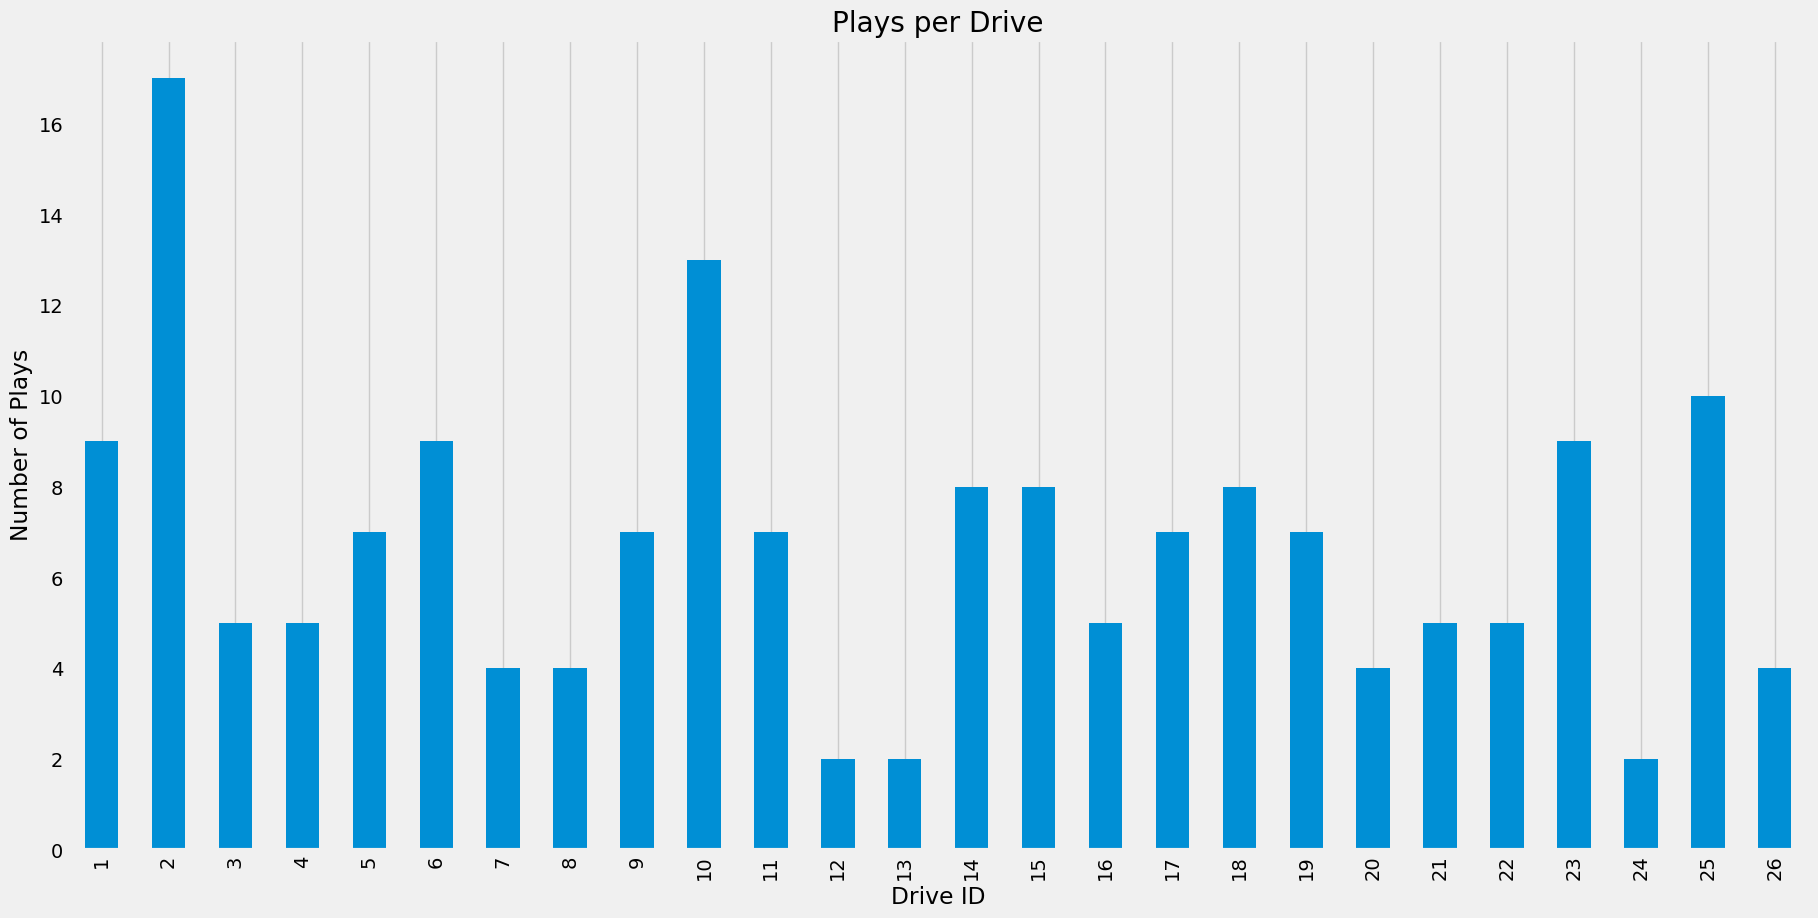

In [9]:
# 📊 Explore number of plays per drive

plays_per_drive = plays.groupby('driveNumber').size()
plays_per_drive.plot(kind='bar', title='Plays per Drive')
plt.xlabel("Drive ID")
plt.ylabel("Number of Plays")
plt.grid(axis='y')
plt.show()


In [10]:
# Explore the structure of drives
drives.head()

,offense,offenseConference,defense,defenseConference,gameId,id,driveNumber,scoring,startPeriod,startYardline,...,endYardsToGoal,endTime,plays,yards,driveResult,isHomeOffense,startOffenseScore,startDefenseScore,endOffenseScore,endDefenseScore
34883,Michigan,Big Ten,Washington,Pac-12,401551789,4015517891,1,True,1,16,...,0,"{'seconds': 14, 'minutes': 10}",8,84,TD,True,0,0,7,0
34884,Washington,Pac-12,Michigan,Big Ten,401551789,4015517892,2,True,1,75,...,8,"{'seconds': 56, 'minutes': 3}",14,67,FG,False,0,7,3,7
34885,Michigan,Big Ten,Washington,Pac-12,401551789,4015517893,3,True,1,14,...,0,"{'seconds': 23, 'minutes': 2}",4,86,TD,True,7,3,14,3
34886,Washington,Pac-12,Michigan,Big Ten,401551789,4015517894,4,False,1,0,...,0,"{'seconds': 21, 'minutes': 0}",3,7,PUNT,False,3,14,3,14
34887,Michigan,Big Ten,Washington,Pac-12,401551789,4015517895,5,True,1,21,...,14,"{'seconds': 28, 'minutes': 13}",5,65,FG,True,14,3,17,3


In [15]:
# Calculate average yards per drive for each team
avg_yards_per_drive = drives.groupby(['offense'])['yards'].mean().reset_index()
avg_yards_per_drive = avg_yards_per_drive.sort_values(by='yards', ascending=False)

avg_yards_per_drive

,offense,yards
0,Michigan,32.923077
1,Washington,23.153846


In [ ]:
# ✅ That’s it for now!

# You've just:
# - Loaded core game data
# - Linked a game to its drives and plays
# - Explored drive structure visually

# 🧪 Next steps:
# - Use `advanced_game_stats` to look at efficiency metrics
# - Join play-level data with outcomes (EPA, success rate, etc.)